In [1]:
# dependencies for file reading
import json
import sys
import itertools
import numpy as np
import os
from scipy import signal
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import soundfile as sf

import librosa # conda install -c conda-forge librosa
import seaborn as sns

# managing parameters
from parammanager import paramManager
from sonyganformat import sonyGanJson
#from Tf_record import tfrecordManager

#Synth Interface (SI)
from genericsynth import synthInterface as SI # the base model for all synths, also some utilities 

#### Demo of synth interface using the single piston 

Note: PistonSynth and EngineRevSynth are both synths that derive from the SI.MySoundModel class (and thus have the interface for parameter setting/getting as well as the generate() function for creating audio.

Here we load PistonSynth just to see the interface in action. Normally it would only be used by EngineRevSynth, and not loaded in a notebook or data set generating program. 

In [2]:
from PistonSynth import PistonSynth   # This is the single-event synth that EngineRevSynth uses [loading just for viz purposes]
foosynth=PistonSynth(amp=1)   # can (optionally) set params for a synth when you create an instance

foosynth.setParam('amp', .5) # Can set any synth parameter with setParam()
foosynth.getParam('amp')    # Get a param value. 

0.5

In [3]:
amin = foosynth.getParam('amp', "min")  # by default, getParam would get val, but here we ask for its min
print("min val of synth param amp is {}".format(amin))

foosynth.setParamNorm('amp', .6)   #setParamNorm uses [0,1] range 
print("now the value of synth param amp is {}".format(   foosynth.getParam('amp')    ))


min val of synth param amp is 0
now the value of synth param amp is 0.6


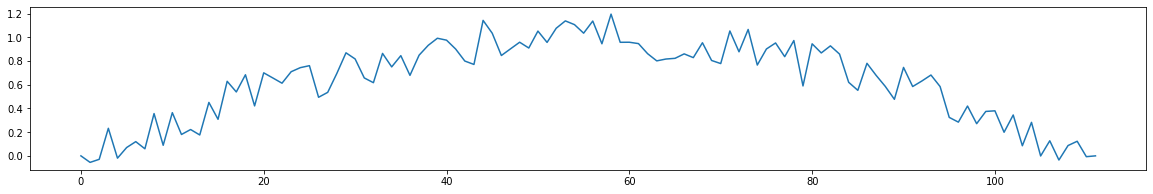

In [4]:
sig=foosynth.generate(.007)   # all synths use generate to create audio. Parameter is length in seconds

plt.figure(figsize=(20,3))
plt.plot(sig)
display(Audio(sig, rate=16000, autoplay=False))


In [5]:
# A handy function to print the names and range of parameters using Synth
foosynth.printParams()

Name:  sinLevel  Current value :  1  Max value  1  Min value  0
Name:  noiseLevel  Current value :  0.2  Max value  1  Min value  0
Name:  amp  Current value :  0.6  Max value  1  Min value  0


For reson 1, f = 102.29541355053516. q=7.607332689020469 and w= 0.8888888888888888
For reson 2, f = 242.02991201737606. q=5.281670916387862 and w= 0.7777777777777778
For reson 3, f = 312.746247012294. q=8.38475902546826 and w= 0.6666666666666667
For reson 4, f = 415.4100472799597. q=5.249060228898715 and w= 0.5555555555555556
For reson 5, f = 504.31846559392517. q=6.154531063056333 and w= 0.4444444444444444

#### Demo of synth interface using the EngineRevSynth

Evdur is 0.007 and ioi is 0.03125


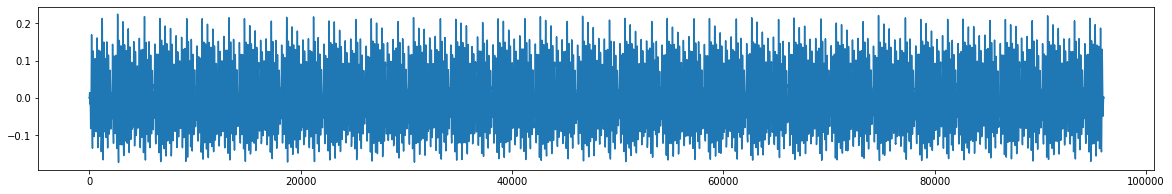

In [73]:
from EngineRevSynth import EngineRevSynth

barsynth=EngineRevSynth()
barsynth.setParam("rate_exp",5) # will make 2^1 events per second
barsynth.setParam("irreg_exp", .25)
#barsynth.setRandomResonance()
barsynth.setResonances([102, 242,   313,    415.5,    704],
                       [3.5,   2.5,   4,   2.6,     3],
                      [.9,   .88,    .57,  .35,       .3])

barsig=barsynth.generate(6)      # will generate 3 seconds of sound


plt.figure(figsize=(20,3))
plt.plot(barsig[:160000])
display(Audio(barsig, rate=16000, autoplay=True))

### Visualize distribution of events

Notice that this code is model-independent (uses only SI utility function, no synth methods)

number of events is 8000


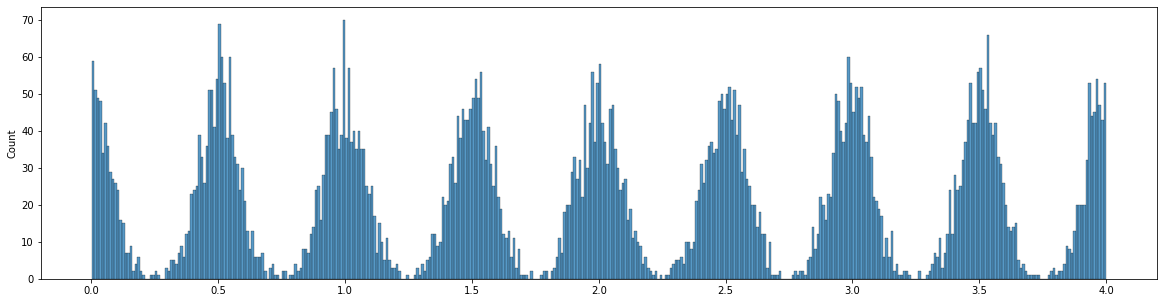

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

events=[]
for i in range(1000) :  #repeat to get enought samples to see the shape of the distribution
                                        #params: (events per second = 2^p1,     sd = .1*p2*10^p2,     seconds)
    events.extend(SI.noisySpacingTimeList(1, .5, 4))
print("number of events is {}".format(len(events)))
plt.figure(figsize=(20,5))
sns.histplot(events, bins=400)
plt.show()


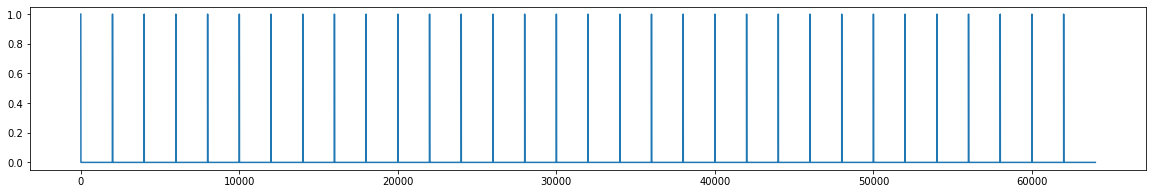

In [8]:
# Show an event list 
elist = SI.noisySpacingTimeList(3, 0, 4)
esig = SI.timeList2Sig(elist,16000,4)

plt.figure(figsize=(20,3))
plt.plot(esig)